In [4]:
%pylab inline
import glob

import ltdata as lt
import importlib
importlib.reload(lt)


class Scan(lt.Data):
    def __init__(self, iden, dataset, **kwargs):
        lt.Data.__init__(self, iden, dataset)
        self._stored = ['iden']
        
        self.filename = iden
        self.other = kwargs.pop('other', None)
        
        
#     @figure
    def plot(self):
        fig = figure()
        
        x = arange(10)
        y = x**2
        
        plot(x, y, label="$y = x^2$")
        legend()
        return fig
    
    
SCANPATH = "/srv/share/callum/labbook2017/19.02.21_example_cooldown_scans/scans/*.txt"
SCANPATH = "../../../phd-labbook/19.02.21_example_cooldown_scans/scans/*.txt"
 


scanset = lt.DataSet(Scan)

@scanset.finder(run=True, every=60)
def find():
    return glob.glob(SCANPATH)
#     return arange(hhdatas.shape[0])[::-1]   

scanset._figout

Populating the interactive namespace from numpy and matplotlib


c:\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['find']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Output(layout=Layout(border='1px solid #004040'))

In [15]:
scanset.update()

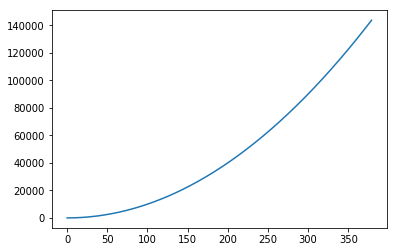

In [5]:
@scanset.figure(name="plot")
def ssplot(dataset):
    fig = figure()
    
    x = arange(len(dataset))
    y = x**2
    plot(x, y)
    
    xlabel("")
    
    return fig